In [7]:
import math
import numpy as np

from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile

from qiskit_aer import QasmSimulator
from qiskit_aer.noise import NoiseModel, pauli_error


In [8]:
# paramters for H2 at R=1.75A
g0 = -0.5597
g1 = +0.1615
g2 = -0.0166
g3 = +0.4148
g4 = +0.1226
g5 = +0.1226
nuclear_repulsion = 0.3023869942
Energy_FCI = -0.97516853

In [9]:
p_reset = 0.1
p_meas = 0.1
p_gate1 = 0.1
p_phase = 0.1

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
error_phase = pauli_error([('Z',p_phase), ('I', 1 - p_phase)])

# Add errors to noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1.compose(error_phase), ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2.compose(error_phase.tensor(error_phase)), ["cx"])

Shots:  600
Original Circuit:


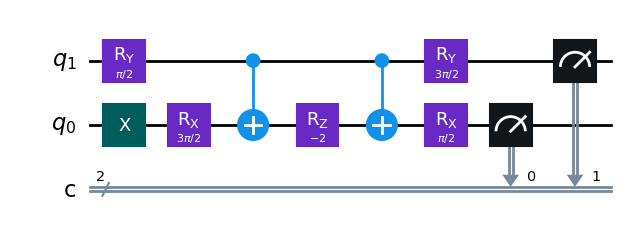

In [10]:
shots = 600
theta = [-2]
backend = QasmSimulator()


print("Shots: ", shots)


# Expectation value of <Z0>, <Z1>, <Z2>
circuit = QuantumCircuit(2,2)
circuit.name = 'H2 STO-3G g1-g3'
circuit.x(0)
circuit.ry(np.pi/2,1)
circuit.rx(3*np.pi/2,0)
circuit.cx(1,0)
circuit.rz(theta[0],0)
circuit.cx(1,0)
circuit.ry(3*np.pi/2,1)
circuit.rx(np.pi/2,0)
circuit.measure(range(2), range(2))

print("Original Circuit:")
circuit.draw()

Transpiled Circuit:


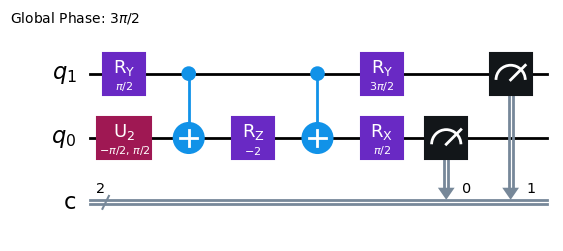

In [11]:
# Run Circuit
transpiled_circuit = transpile(circuit, backend)
print("Transpiled Circuit:")
transpiled_circuit.draw()

#### No Transpile Circuit

Result: Result(backend_name='qasm_simulator', backend_version='0.14.2', qobj_id='', job_id='1c7f1cc7-37aa-45df-904c-79a9f5aa6553', success=True, results=[ExperimentResult(shots=600, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 431, '0x1': 169}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='H2 STO-3G g1-g3', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=3163856281, metadata={'time_taken': 0.004987385, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.002835547, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7640, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'th

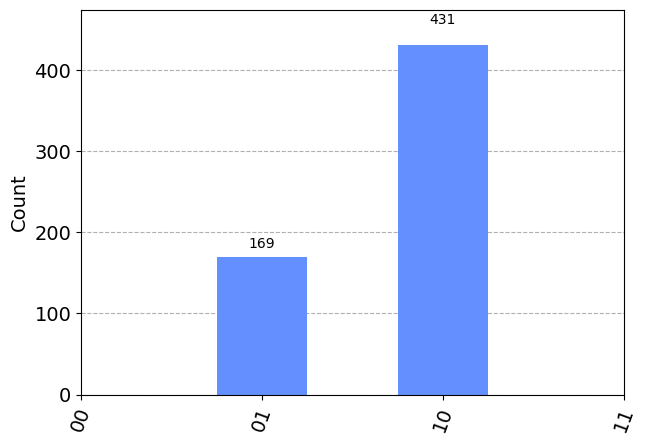

In [34]:
# job = backend.run(transpiled_circuit, shots=shots)
job = backend.run(circuit, shots=shots)
result = job.result()
counts = result.get_counts(circuit)

print("Result:", result)
print("Counts:", counts)
print("Counts Keys:", counts.items())

# Probability Distribution
for k in {'00', '01', '10', '11'}:
    if k not in counts.keys():
        counts[k] = 0 # if k isn't already a key in 'counts', add k to counts with a value of 0
sorted_counts = sorted(counts.items()) # sort the items (key-value pairs) by key
print("Sorted Counts:", counts)

output_distr = [ v[1] / shots for v in sorted_counts ] # normalize
if (len(output_distr) == 1):
    output_distr.append(1-output_distr[0]) # handle single outcome case
print("Output Distribution", output_distr)

E = g0 + nuclear_repulsion
E1 = -g1 * (output_distr[0] + output_distr[1] - output_distr[2] - output_distr[3])
E2 = -g2 * (output_distr[0] - output_distr[1] + output_distr[2] - output_distr[3])
E3 = g3 * (output_distr[0] - output_distr[1] - output_distr[2] + output_distr[3])
E += E1 + E2 + E3

print("E =", E)

plot_histogram(counts)


#### Transpiled Circuit

Result: Result(backend_name='qasm_simulator', backend_version='0.14.2', qobj_id='', job_id='e59cbb3f-336f-4053-b608-1322e00f794c', success=True, results=[ExperimentResult(shots=600, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 183, '0x2': 417}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=4.71238898038469, memory_slots=2, n_qubits=2, name='H2 STO-3G g1-g3', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=4203021749, metadata={'time_taken': 0.050723427, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.015410631, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7640, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qu

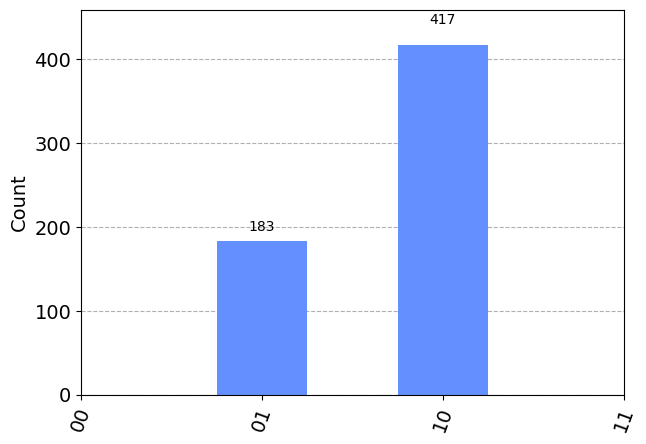

In [48]:
job = backend.run(transpiled_circuit, shots=shots)
# job = backend.run(circuit, shots=shots)
result = job.result()
counts = result.get_counts(circuit)

print("Result:", result)
print("Counts:", counts)
print("Counts Keys:", counts.items())

# Probability Distribution
for k in {'00', '01', '10', '11'}:
    if k not in counts.keys():
        counts[k] = 0 # if k isn't already a key in 'counts', add k to counts with a value of 0
sorted_counts = sorted(counts.items()) # sort the items (key-value pairs) by key
print("Sorted Counts:", counts)

output_distr = [ v[1] / shots for v in sorted_counts ] # normalize
if (len(output_distr) == 1):
    output_distr.append(1-output_distr[0]) # handle single outcome case
print("Output Distribution", output_distr)

E = g0 + nuclear_repulsion
E1 = -g1 * (output_distr[0] + output_distr[1] - output_distr[2] - output_distr[3])
E2 = -g2 * (output_distr[0] - output_distr[1] + output_distr[2] - output_distr[3])
E3 = g3 * (output_distr[0] - output_distr[1] - output_distr[2] + output_distr[3])
E += E1 + E2 + E3

print("E =", E)

plot_histogram(counts)
